# Eigenvalue Results

In [25]:
import openseespy.opensees as ops
import opstool as opst
import matplotlib.pyplot as plt

We use the built-in arch bridge example and visualize it:

OPSTOOL ::  Model data has been saved to _OPSTOOL_ODB/ModelData-None.nc!

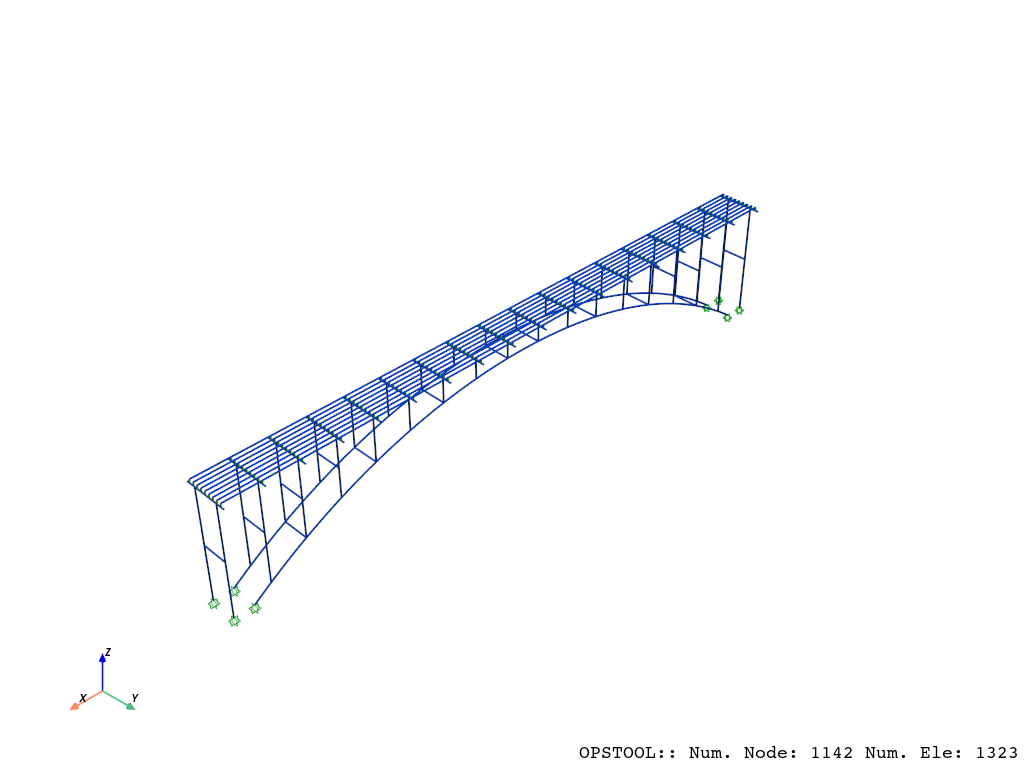

In [22]:
opst.load_ops_examples("ArchBridge")

# plot
opst.vis.pyvista.set_plot_props(notebook=True)
fig = opst.vis.pyvista.plot_model()
fig.show(jupyter_backend="static")

## Eigenvalue analysis data saving

The following is our automatic analysis and saving of the data for the first 12 modes:

In [3]:
opst.post.save_eigen_data(odb_tag=1, mode_tag=12)

Using DomainModalProperties - Developed by: Massimo Petracca, Guido Camata, ASDEA Software Technology


OPSTOOL ::  Eigen data has been saved to _OPSTOOL_ODB/EigenData-1.nc!

## Read the eigen data

The following reads the saved data, noting that the ``odb_tag`` parameter is used to identify which result is being read

In [4]:
model_props, eigen_vectors = opst.post.get_eigen_data(odb_tag=1)

OPSTOOL ::  Loading eigen data from _OPSTOOL_ODB/EigenData-1.nc ...

### Modal property data

Modal property data is saved as an 
[xarray.DataArray](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) structure, which facilitates more user-friendly data handling.

In [5]:
model_props

<xarray.DataArray 'ModalProps' (modeTags: 12, Properties: 34)> Size: 3kB
[408 values with dtype=float64]
Coordinates:
  * modeTags    (modeTags) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * Properties  (Properties) <U22 3kB 'eigenLambda' ... 'partiMassRatiosCumuRMY'
Attributes:
    domainSize:     3
    totalMass:      [4.36334920e+03 4.36334920e+03 4.36334920e+03 2.49393441e...
    totalFreeMass:  [4.23989360e+03 4.23989360e+03 4.23989360e+03 2.06174500e...
    centerOfMass:   [ 1.67585039e-17  2.55567185e-17 -1.69285810e+00]

We can convert it into a ``pandas DataFrame`` for a more organized appearance:

In [24]:
model_props_df = model_props.to_pandas()
model_props_df.head()

Properties,eigenLambda,eigenOmega,eigenFrequency,eigenPeriod,partiFactorMX,partiFactorMY,partiFactorRMZ,partiFactorMZ,partiFactorRMX,partiFactorRMY,...,partiMassRatiosRMZ,partiMassRatiosMZ,partiMassRatiosRMX,partiMassRatiosRMY,partiMassRatiosCumuMX,partiMassRatiosCumuMY,partiMassRatiosCumuRMZ,partiMassRatiosCumuMZ,partiMassRatiosCumuRMX,partiMassRatiosCumuRMY
modeTags,,,,,,,,,,,,,,,,,,,,,
1,21.816888,4.670855,0.743390,1.345189,1.305441e-10,5.787614e+01,-1.697211e-08,-3.794258e-11,-1.503664e+02,-4.976269e-09,...,4.030547e-21,3.395462e-23,1.096647e+01,3.396501e-22,4.019382e-22,79.003097,4.030547e-21,3.395462e-23,10.966466,3.396501e-22
2,55.609654,7.457188,1.186848,0.842568,3.192704e+01,-3.062447e-10,-7.511326e-07,3.405789e-10,7.208872e-11,-1.308159e+03,...,7.894512e-18,2.735776e-21,2.520575e-24,2.347173e+01,2.404154e+01,79.003097,7.898543e-18,2.769730e-21,10.966466,2.347173e+01
3,56.147744,7.493180,1.192577,0.838521,-1.036844e-08,-3.770847e-10,-2.329483e+03,-2.446615e-11,1.420603e-09,4.228518e-07,...,7.592960e+01,1.411810e-23,9.788370e-22,2.452452e-18,2.404154e+01,79.003097,7.592960e+01,2.783848e-21,10.966466,2.347173e+01
4,110.048060,10.490379,1.669596,0.598947,-2.376746e-11,-1.756824e+01,-4.046576e-10,4.418021e-11,7.048508e+01,2.843537e-09,...,2.291224e-24,4.603632e-23,2.409680e+00,1.109026e-22,2.404154e+01,86.282594,7.592960e+01,2.829885e-21,13.376147,2.347173e+01
5,167.129510,12.927858,2.057532,0.486019,-4.080845e-10,1.466662e-10,-4.120430e-09,1.323864e+01,1.085901e-09,1.374252e-08,...,2.375621e-22,4.133632e+00,5.719338e-22,2.590340e-21,2.404154e+01,86.282594,7.592960e+01,4.133632e+00,13.376147,2.347173e+01


For example, we can index out the periods data:

In [7]:
print(f"*** Eigen periods:\n {model_props_df["eigenPeriod"]}")

*** Eigen periods:
 modeTags
1     1.345189
2     0.842568
3     0.838521
4     0.598947
5     0.486019
6     0.382900
7     0.317327
8     0.296861
9     0.288235
10    0.253657
11    0.250341
12    0.244309
Name: eigenPeriod, dtype: float64


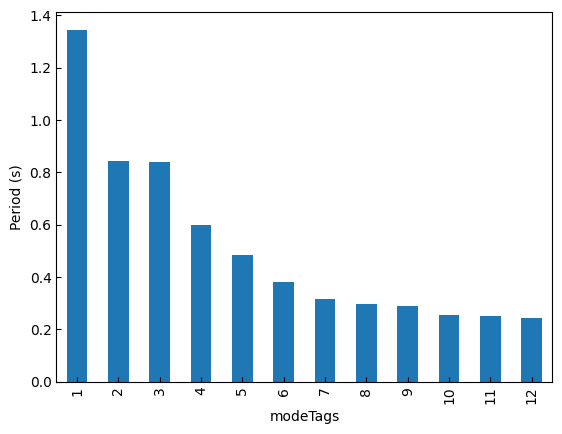

In [28]:
periods = model_props_df["eigenPeriod"]
periods.plot.bar()
plt.ylabel("Period (s)")
plt.show()

For example, we can index out the ``cumulative mass participation ratio``:

In [8]:
keys = [
    "partiMassRatiosCumuMX",
    "partiMassRatiosCumuMY",
    "partiMassRatiosCumuMZ",
]
print(f"*** Cumulative participation mass ratio:\n {model_props_df[keys].head()}")

*** Cumulative participation mass ratio:
 Properties  partiMassRatiosCumuMX  partiMassRatiosCumuMY  \
modeTags                                                   
1                    4.019382e-22              79.003097   
2                    2.404154e+01              79.003097   
3                    2.404154e+01              79.003097   
4                    2.404154e+01              86.282594   
5                    2.404154e+01              86.282594   

Properties  partiMassRatiosCumuMZ  
modeTags                           
1                    3.395462e-23  
2                    2.769730e-21  
3                    2.783848e-21  
4                    2.829885e-21  
5                    4.133632e+00  


### Eigen vectors

In structural dynamics, ``eigenvectors`` play a crucial role in understanding the behavior of structures under dynamic loads. They provide insights into how a structure deforms or vibrates at specific natural frequencies (eigenvalues). These vectors, often referred to as mode shapes, are fundamental in modal analysis and dynamic response studies.

In [9]:
eigen_vectors

<xarray.DataArray 'EigenVectors' (modeTags: 12, nodeTags: 1142, DOFs: 6)> Size: 658kB
[82224 values with dtype=float64]
Coordinates:
  * modeTags  (modeTags) int32 48B 1 2 3 4 5 6 7 8 9 10 11 12
  * nodeTags  (nodeTags) int32 5kB 1 2 3 4 5 6 ... 1300 1301 1302 1303 1304 1305
  * DOFs      (DOFs) <U2 48B 'UX' 'UY' 'UZ' 'RX' 'RY' 'RZ'

You can retrieve dimension names in ``xarray.DataArray`` using the ``dims`` attribute:

In [10]:
eigen_vectors.dims

('modeTags', 'nodeTags', 'DOFs')

The ``.sel`` method can be used to retrieve specific elements corresponding to a particular dimension.
For example, the following code helps us index the eigenvector at specific mode tags, node tags, and degrees of freedom.

In [18]:
eigen_vectors_sub = eigen_vectors.sel(
    modeTags=[1, 2, 3, 4, 5], nodeTags=[100, 200, 300], DOFs=["UX", "UY", "UZ"]
)
eigen_vectors_sub

<xarray.DataArray 'EigenVectors' (modeTags: 5, nodeTags: 3, DOFs: 3)> Size: 360B
[45 values with dtype=float64]
Coordinates:
  * modeTags  (modeTags) int32 20B 1 2 3 4 5
  * nodeTags  (nodeTags) int32 12B 100 200 300
  * DOFs      (DOFs) <U2 24B 'UX' 'UY' 'UZ'

Retrieve its data:

In [19]:
eigen_vectors_sub.data

array([[[ 2.63070107e-05,  1.86729203e-02, -1.52279473e-03],
        [-2.18801193e-04,  2.27953721e-02,  1.61430297e-03],
        [-7.49425264e-04,  1.24680018e-02, -6.84216416e-04]],

       [[ 1.07430986e-02, -1.06591436e-08,  1.86506167e-02],
        [ 7.95070024e-03, -2.17134681e-07,  1.26818563e-02],
        [ 7.36071603e-03,  1.19360223e-07, -7.40619716e-03]],

       [[ 1.20462762e-03, -7.55738596e-03,  1.80162219e-03],
        [-1.36398139e-03, -6.54061212e-03, -1.15008967e-03],
        [ 1.03647160e-03,  2.41749630e-02, -2.06422175e-03]],

       [[ 5.90844295e-04,  9.57100011e-03,  1.01994926e-03],
        [-7.27628557e-04,  1.14606700e-02, -4.73067678e-04],
        [-2.31617124e-03, -2.16609879e-02,  2.24017969e-03]],

       [[-1.99630301e-03, -9.49229075e-07,  1.41933100e-02],
        [ 2.35318153e-05, -6.52638665e-07,  2.62522766e-02],
        [-3.22705290e-04, -3.92921381e-08, -8.33629307e-03]]])